In [240]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 

In [241]:
# Load the perceptron-data file
perceptron_data = pickle.load(open('./data/perceptron-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
perceptron_df = pd.DataFrame()
perceptron_df['v0'] = perceptron_data['vectors'][0]
perceptron_df['v1'] = perceptron_data['vectors'][1]
perceptron_df['labels'] = perceptron_data['labels'].astype(np.int)

perceptron_df.head()

,v0,v1,labels
0,-3.967563,0.029670,1
1,3.701603,-0.424998,0
2,-1.391995,-0.693690,1
3,0.764722,0.596842,1
4,-0.442530,3.152025,1


In [242]:
class Perceptron:
    
    def __init__(self, epochs, learning_rate, run_number=1):
        # weights corresponding to [bias, w0, w1]
        self.weights = [0.0, 0.0, 0.0]
        self.epochs = epochs
        self.L = learning_rate
        self.run_number = run_number    # for plotting
        self.labels_correct = [None]*self.epochs
    
    def predict(self, vector):
        #y = (w0 * v0) + (w1 * v1) + bias
        y = (self.weights[1] * vector['v0']) + (self.weights[2] * vector['v1']) + self.weights[0]
        return 1 if y >= 0.0 else 0
    
    def train(self, df, accuracy):
        df['predictions'] = np.nan
        df['correct'] = np.nan
        
        for n in range(self.epochs):
            #print('\n*** epoch:', n+1,'***')
            #print('weights:',self.weights)
            
            for index,V in df.iterrows():    # would a lambda function work here instead?
                # print(self.weights)
                # Run the prediction function on each sample
                y = self.predict(V)
                # Update predictions col for each sample
                df.at[index,'predictions'] = y
                
                # Adjust the weights before continuing to the next sample
                # dwi = L*vi*(y_desired - y)
                self.weights[0] = self.weights[0] + self.L*(V['labels'] - y)    # bias
                self.weights[1] = self.weights[1] + self.L*V['v0']*(V['labels'] - y)
                self.weights[2] = self.weights[2] + self.L*V['v1']*(V['labels'] - y)
            
            # Count the number of correct predictions for each epoch
            df['correct'] = df.apply(lambda x: x['labels'] == x['predictions'], axis=1)
            self.labels_correct[n] = (df['correct'].sum() / len(df))
        
        # After a full run, add fractions correct to df for plotting
        #print(self.labels_correct)
        accuracy[f'run_{self.run_number}'] = self.labels_correct
            
        print('Final weights:', self.weights)
        return self.weights


In [88]:
epochs = 300
learning_rate = 0.001

# Create dataframe for plotting purposes
accuracy = pd.DataFrame()
accuracy['epoch'] = list(range(1,epochs+1))

for n in range(1,11):
    print('Running iteration',n)
    perceptron = Perceptron(epochs, learning_rate, run_number=n)
    samples = perceptron_df.sample(frac=1).reset_index(drop=True)
    perceptron.train(samples, accuracy)


Running iteration 1
Final weights: [0.0, -0.009518591061228845, 0.0139808435814757]
Running iteration 2
Final weights: [0.0, -0.01666217967267821, 0.023682783330995508]
Running iteration 3
Final weights: [-0.001, -0.024686488305683547, 0.03345629149343752]
Running iteration 4
Final weights: [-0.001, -0.022499652873916927, 0.033151281101149684]
Running iteration 5
Final weights: [-0.001, -0.025269229212293205, 0.031547719882202306]
Running iteration 6
Final weights: [0.001, -0.02510147843687464, 0.03259774685281093]
Running iteration 7
Final weights: [-0.001, -0.015807815964484433, 0.02410245758750176]
Running iteration 8
Final weights: [-0.002, -0.015061740035619638, 0.023592821087829965]
Running iteration 9
Final weights: [-0.001, -0.023129299517932897, 0.031893822738821354]
Running iteration 10
Final weights: [-0.002, -0.017411654930412995, 0.02232406779724348]


In [89]:
# Display the accuracy dataframe
accuracy

,epoch,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,1,0.91,0.94,0.92,0.90,0.93,0.92,0.94,0.92,0.92,0.91
1,2,0.98,0.95,0.96,0.97,0.96,0.93,0.92,0.95,0.96,0.96
2,3,0.95,0.97,0.98,0.96,0.96,0.98,0.98,0.97,0.96,0.96
3,4,0.96,0.97,0.97,0.94,0.97,0.98,0.96,0.98,0.95,0.99
4,5,0.96,0.95,0.94,0.96,0.98,0.96,0.94,0.94,0.98,0.98
...,...,...,...,...,...,...,...,...,...,...,...
295,296,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.98
296,297,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.99
297,298,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.98
298,299,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.98


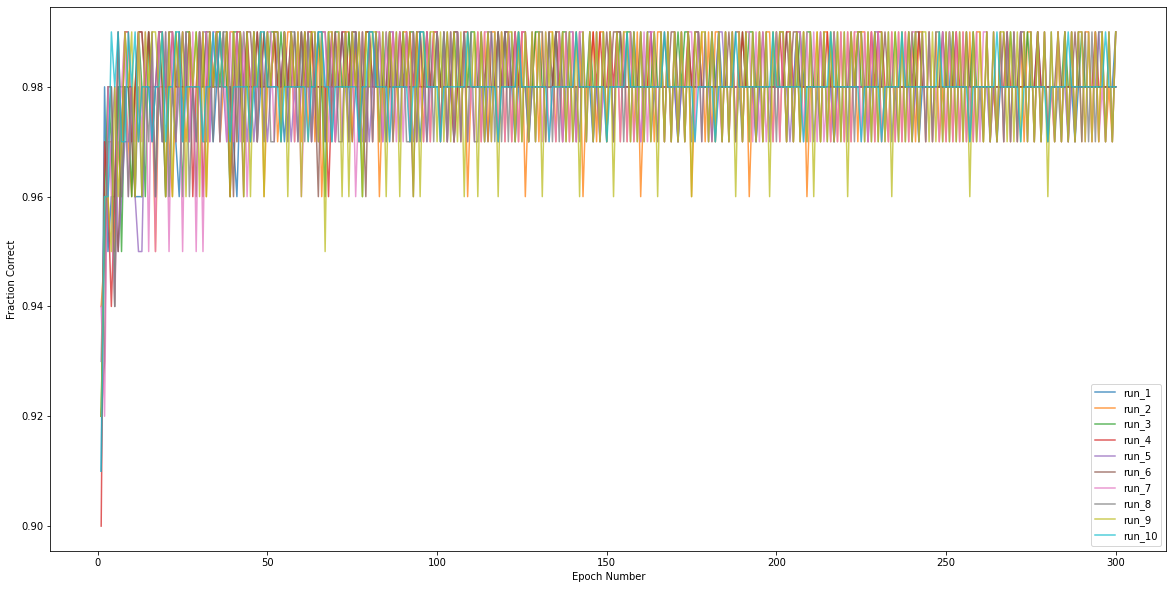

In [102]:
accuracy.plot(x='epoch', y=['run_1','run_2','run_3','run_4','run_5',
                            'run_6','run_7','run_8','run_9','run_10'],
            figsize=(20,10), alpha=0.75, xlabel='Epoch Number', ylabel='Fraction Correct')

## Question 2

In [284]:
# Load the regression-data file
regression_data = pickle.load(open('./data/regression-data.pkl','rb'),encoding='latin1')

# Separate test and train from the pickle dict into 2 dataframes
test_df = pd.DataFrame()
test_df['x'] = regression_data['testx'][0]
test_df['y'] = regression_data['testy'][0]

train_df = pd.DataFrame()
train_df['x'] = regression_data['trainx'][0]
train_df['y'] = regression_data['trainy'][0]

train_df.head()

,x,y
0,-0.992103,0.079115
1,-0.958496,-0.118512
2,-0.823320,0.788832
3,-0.661778,0.934026
4,-0.603874,0.542292


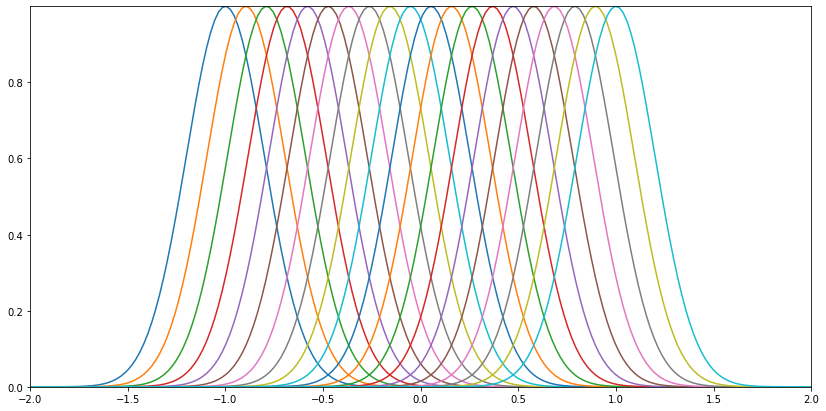

In [285]:
## Plot 20 Gaussian functions with given values
n = 20
peak = 1.0
sigma = 0.2                      # the stdev
lb = -1.0                        # lower bound for x value of peaks
ub = 1.0                         # upper bound ^
centres = np.linspace(lb,ub,n)   # the positions of the peaks of each function
x_range = np.linspace(-2,2,200)  # range of x values to plot

def gaussian(x, a, b, c):
    # Source: https://www.sciencedirect.com/topics/engineering/gaussian-function
    return a*np.exp( (-(x-b)**2) / (2*c**2) )

plt.figure(figsize=(14,7))
plt.margins(x=0,y=0)
for centre in centres:
    plt.plot(x_range, gaussian(x_range, peak, centre, sigma))
plt.show()

In [389]:
# Generate the matrix F and column vector T
def init_F_and_T(df, m):
    F = np.zeros((len(train_df),m+1))
    T = np.zeros((len(train_df),1))
    for i, row in df.iterrows():
        F[i] = np.array([row['x']**n for n in range(m+1)])
        T[i] = row['y']
    return F, T

# Calculate least squares regression weights
def regularized_LS(F, T, L, m):
    Ft_F = np.matmul(F.T,F)
    Ft_T = np.matmul(F.T,T)
    I = np.identity(m+1)
    #print(Ft_F)
    #print(Ft_T)
    #print(I)
    W = np.matmul(np.linalg.inv(Ft_F + L*I), Ft_T)
    return W

# Use the calculated weights with the regulizer function
def regression_model(X, weights):
    #print('X is',X)
    y = 0
    for i,w in enumerate(weights):
        #print(i,w)
        y = y + X[i]*w[0]
    return y

## Calculate least-squares optimal regression weights for approximation of the training data
m = 3
F, T = init_F_and_T(train_df,m)
testL = 10**(-8)
#regression_model(F[0],regularized_LS(F,T,testL,m+1))
regularized_LS(F,T,testL,m)

array([[ 0.5250845 ],
       [-0.12209685],
       [-1.09708727],
       [-0.67792463]])

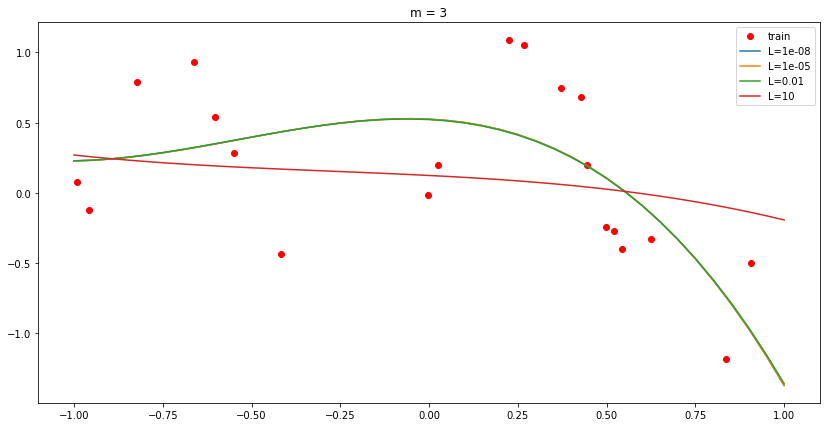

In [390]:
# Plot training data with regularized regression models in steps of 0.05
def X_vec(x, m):
    return np.array([x**n for n in range(m+1)])

m = 3
x_range = np.arange(-1,1.05,0.05)  # range of x values to plot
Lambda = [10**(-8), 10**(-5), 10**(-2), 10]    # given values of lambda to use

plt.figure(figsize=(14,7))
#plt.plot(test_df['x'],test_df['y'],'o',color='blue',label='test')
plt.plot(train_df['x'],train_df['y'],'o',color='red',label='train')

for L in Lambda:
    weights = regularized_LS(F,T,L,m)
    #print('L=',L,'\nW=\n',weights)
    plt.plot(x_range, regression_model(X_vec(x_range,m), weights), label=f'L={L}')
plt.title(f'm = {m}')
plt.legend()
plt.show()

### Experiment with changing m
We can't see the graphs for 2 of the L values, so I will try changing m to make them visible, and to see the effect of changing m

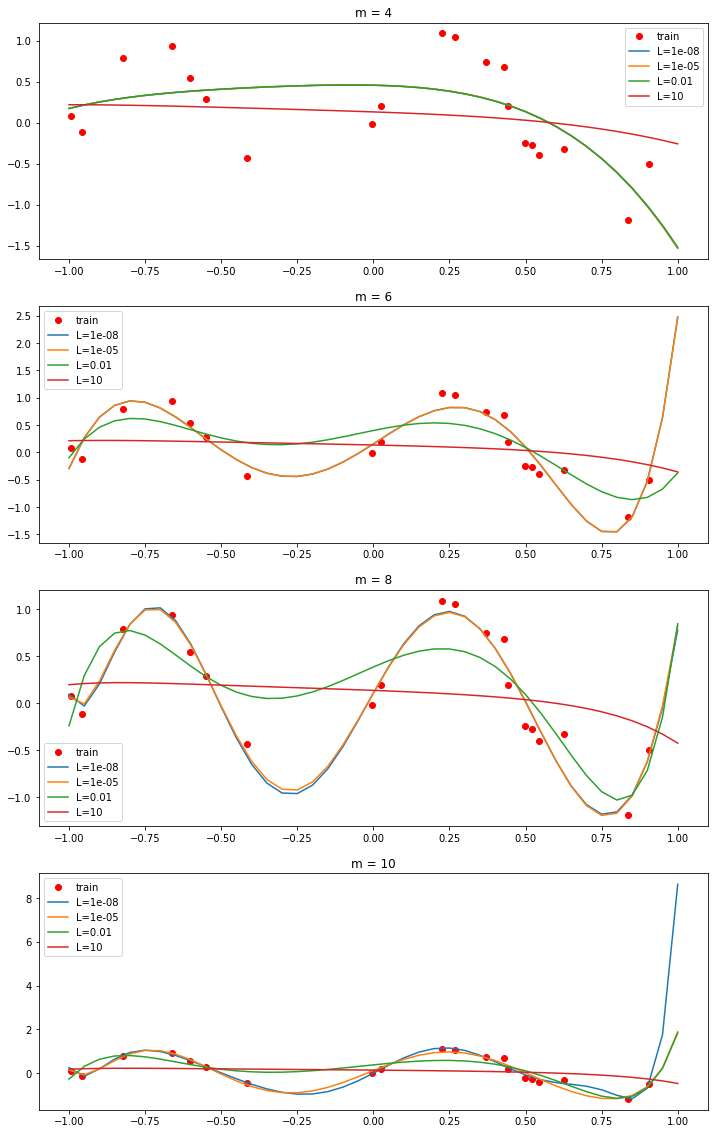

In [419]:
m_list = [4,6,8,10]
fig, axs = plt.subplots(4, figsize=(12,20))

for i,ax in enumerate(axs):
    m = m_list[i]
    ax.set_title(f'm = {m}')
    F, T = init_F_and_T(train_df,m)
    ax.plot(train_df['x'],train_df['y'],'o',color='red',label='train')
    for L in Lambda:
        weights = regularized_LS(F,T,L,m)
        #print('L=',L,'\nW=\n',weights)
        ax.plot(x_range, regression_model(X_vec(x_range,m), weights), label=f'L={L}')
        ax.legend()

In [ ]:
# Calculate the sum squared error for training and test data
# and plot as a function of ln(L)

# reset m to 6 because it produced a better approximation, but don't want to overfit
m = 6
error = pd.DataFrame()

# test every point we want to predict, check the error, sum for every point??
# sum_i((y_i-t_i)^2) i is all the diff points, yi is the output, ti is desired output

## Question 3

In [420]:
# Load the backprop-data file
backprop_data = pickle.load(open('./data/backprop-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
backprop_df = pd.DataFrame()
backprop_df['v0'] = backprop_data['vectors'][0]
backprop_df['v1'] = backprop_data['vectors'][1]
backprop_df['labels'] = backprop_data['labels'].astype(np.int)

backprop_df

,v0,v1,labels
0,2.370732,0.114586,1
1,0.227078,4.881249,0
2,0.279069,0.752080,1
3,-0.260257,-0.025993,1
4,0.096724,0.144143,1
...,...,...,...
195,-2.621964,3.955295,0
196,0.637969,-0.366977,1
197,1.061410,0.056378,1
198,5.214607,0.559901,0


In [129]:
# hidden units nonlinearity
z = np.tanh(a)
# output unit nonlinearity
z = 1/(1 - np.exp(-a))

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])